> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [43]:
#import functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline 
from functools import reduce

SyntaxError: invalid syntax (<ipython-input-43-667ee6ba00fa>, line 1)

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_match=pd.read_csv("Match.csv")
df_league=pd.read_csv("League.csv")
df_country=pd.read_csv("Country.csv")
df_team_attributes=pd.read_csv("Team_Attributes.csv")
df_team=pd.read_csv("Team.csv")
dfplayer=pd.read_csv("Player.csv")
dfplayer_attributes=pd.read_csv("Player_Attributes.csv")


### Data Cleaning
Check Data and do cleaning process
 

In [3]:
#check data
dfplayer.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [4]:
#check data
dfplayer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [5]:
#check data
dfplayer_attributes=pd.read_csv("Player_Attributes.csv")

In [6]:
#check data
dfplayer_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
#check data
dfplayer_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [8]:
#check data
dfplayer_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [9]:
#merge players id with attributes to get clear description
df_full_player_stats = dfplayer.merge(dfplayer_attributes,left_on='player_api_id', right_on='player_api_id', how='outer')


In [10]:
df_full_player_stats.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [11]:
df_full_player_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_x                  183978 non-null  int64  
 1   player_api_id         183978 non-null  int64  
 2   player_name           183978 non-null  object 
 3   player_fifa_api_id_x  183978 non-null  int64  
 4   birthday              183978 non-null  object 
 5   height                183978 non-null  float64
 6   weight                183978 non-null  int64  
 7   id_y                  183978 non-null  int64  
 8   player_fifa_api_id_y  183978 non-null  int64  
 9   date                  183978 non-null  object 
 10  overall_rating        183142 non-null  float64
 11  potential             183142 non-null  float64
 12  preferred_foot        183142 non-null  object 
 13  attacking_work_rate   180748 non-null  object 
 14  defensive_work_rate   183142 non-null  object 
 15  

In [12]:
df_full_player_stats.describe()

,id_x,player_api_id,player_fifa_api_id_x,height,weight,id_y,player_fifa_api_id_y,overall_rating,potential,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.00000,183978.000000,183142.000000,183142.000000,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,5520.197785,135900.617324,165636.285936,181.878872,168.776245,91989.50000,165671.524291,68.600015,73.460353,55.086883,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,3191.425870,136927.840510,53856.899802,6.394818,15.088920,53110.01825,53851.094769,7.041139,6.592271,17.242135,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.000000,2625.000000,2.000000,157.480000,117.000000,1.00000,2.000000,33.000000,39.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2754.000000,34763.000000,155681.000000,177.800000,159.000000,45995.25000,155798.000000,64.000000,69.000000,45.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,5532.000000,77741.000000,183471.000000,182.880000,168.000000,91989.50000,183488.000000,69.000000,74.000000,59.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,8256.000000,191080.000000,199843.750000,185.420000,179.000000,137983.75000,199848.000000,73.000000,78.000000,68.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000,183978.00000,234141.000000,94.000000,97.000000,95.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [13]:
#cleaning data
sum(df_full_player_stats.duplicated())

0

In [14]:
#cleaning data
df_full_player_stats.isnull().sum()

id_x                       0
player_api_id              0
player_name                0
player_fifa_api_id_x       0
birthday                   0
height                     0
weight                     0
id_y                       0
player_fifa_api_id_y       0
date                       0
overall_rating           836
potential                836
preferred_foot           836
attacking_work_rate     3230
defensive_work_rate      836
crossing                 836
finishing                836
heading_accuracy         836
short_passing            836
volleys                 2713
dribbling                836
curve                   2713
free_kick_accuracy       836
long_passing             836
ball_control             836
acceleration             836
sprint_speed             836
agility                 2713
reactions                836
balance                 2713
shot_power               836
jumping                 2713
stamina                  836
strength                 836
long_shots    

In [15]:
#cleaning data
df_full_player_stats.dropna(inplace=True)

In [16]:
#cleaning data
df_full_player_stats.isnull().sum().any()

False

In [17]:
df_full_player_stats.isnull().sum()

id_x                    0
player_api_id           0
player_name             0
player_fifa_api_id_x    0
birthday                0
height                  0
weight                  0
id_y                    0
player_fifa_api_id_y    0
date                    0
overall_rating          0
potential               0
preferred_foot          0
attacking_work_rate     0
defensive_work_rate     0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
dribbling               0
curve                   0
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility                 0
reactions               0
balance                 0
shot_power              0
jumping                 0
stamina                 0
strength                0
long_shots              0
aggression              0
interceptions           0
positioning             0
vision      

In [18]:
#time
df_full_player_stats['date']=pd.to_datetime(df_full_player_stats['date'])
df_full_player_stats['birthday']=pd.to_datetime(df_full_player_stats['birthday'])

In [19]:
df_full_player_stats.drop(['player_fifa_api_id_y'],axis=1,inplace=True)


In [20]:
df_full_player_stats.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,date,overall_rating,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1,2016-02-18,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2,2015-11-19,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,3,2015-09-21,62.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,4,2015-03-20,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,5,2007-02-22,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [21]:
#get age of player to analysis process
def from_dob_to_age(born):
    today = pd.Timestamp.now()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
age=[]
age=df_full_player_stats['birthday'].apply(lambda x: from_dob_to_age(x))
age=df_full_player_stats['age']=age

In [22]:
df_full_player_stats.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,date,overall_rating,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1,2016-02-18,67.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,29
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2,2015-11-19,67.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,29
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,3,2015-09-21,62.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,29
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,4,2015-03-20,61.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,29
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,5,2007-02-22,61.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,29


In [23]:
#check data
df_full_player_stats.age.value_counts()

33    14953
34    13850
32    13800
35    13166
31    12784
30    12733
36    11264
37    10835
29    10483
38     9539
28     8565
39     8196
40     7087
27     6774
41     6252
42     4328
26     4207
43     2989
25     2526
44     1916
45     1367
24     1034
46      651
47      459
48      171
23      157
49      115
50       65
51       50
22       20
52       18
Name: age, dtype: int64

In [24]:
#merge match with league to get country and leaue name
df_match_league = df_match.merge(df_league,left_on='country_id', right_on='country_id', how='outer')
#df_match_league =pd.merge(df_match,df_league,how='outer')
                       
df_match_league.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id_y,name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,1,Belgium Jupiler League


In [25]:
df_match_league.loc[10000:11010,"name"]

10000    Germany 1. Bundesliga
10001    Germany 1. Bundesliga
10002    Germany 1. Bundesliga
10003    Germany 1. Bundesliga
10004    Germany 1. Bundesliga
                 ...          
11006            Italy Serie A
11007            Italy Serie A
11008            Italy Serie A
11009            Italy Serie A
11010            Italy Serie A
Name: name, Length: 1011, dtype: object

In [26]:
#select importat rows
df_match_league_flitered = df_match_league[['country_id','league_id','season','stage','date','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','name']]

In [27]:
df_match_league_flitered.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium Jupiler League
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium Jupiler League
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium Jupiler League
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium Jupiler League
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium Jupiler League


In [28]:
df_match_league_flitered.duplicated().sum()

0

In [29]:
df_match_league_flitered.isnull().sum(axis=0)

country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
name                0
dtype: int64

In [30]:
#teams improved the most over the time?
#get points for each team
df_match_league_flitered['points_home_team'] = np.where(df_match_league_flitered['home_team_goal']> df_match_league_flitered['away_team_goal'],3,0)
df_match_league_flitered['points_home_team'] = np.where(df_match_league_flitered['home_team_goal'] == df_match_league_flitered['away_team_goal'],1,df_match_league_flitered['points_home_team'])
df_match_league_flitered['points_away_team'] = np.where(df_match_league_flitered['away_team_goal']> df_match_league_flitered['home_team_goal'],3,0)
df_match_league_flitered['points_away_team'] = np.where(df_match_league_flitered['home_team_goal'] == df_match_league_flitered['away_team_goal'],1,df_match_league_flitered['points_away_team'])


<ipython-input-30-712366879125>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match_league_flitered['points_home_team'] = np.where(df_match_league_flitered['home_team_goal']> df_match_league_flitered['away_team_goal'],3,0)
<ipython-input-30-712366879125>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match_league_flitered['points_home_team'] = np.where(df_match_league_flitered['home_team_goal'] == df_match_league_flitered['away_team_goal'],1,df_match_league_flitered['points_home_team'])
<ipython-

In [31]:
df_match_league_flitered.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name,points_home_team,points_away_team
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium Jupiler League,1,1
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium Jupiler League,1,1
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium Jupiler League,0,3
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium Jupiler League,3,0
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium Jupiler League,0,3


In [32]:
df_match_league_filtered_names = df_match.merge(df_league,left_on='country_id', right_on='country_id', how='outer')


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What Attributes do Age impacts?)

<ipython-input-33-5aa277474653>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_full_player_stats.groupby(["age"])["overall_rating","agility","reactions","stamina","acceleration","sprint_speed"].mean().plot()


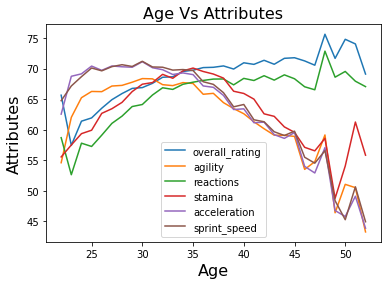

In [33]:
df_full_player_stats.groupby(["age"])["overall_rating","agility","reactions","stamina","acceleration","sprint_speed"].mean().plot()
plt.title("Age Vs Attributes",fontsize=16)
plt.xlabel('Age',fontsize=16)
plt.ylabel('Attributes',fontsize=16);

This is pretty natural that all physical attributes impact by age.

### Research Question 2  (What Attributes do Height impacts!)

<ipython-input-34-fca70ddb086c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_full_player_stats.groupby(["height"])["heading_accuracy","dribbling","ball_control","acceleration","sprint_speed"].mean().plot()


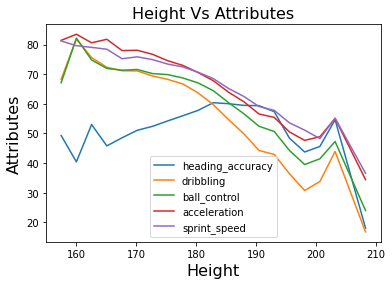

In [34]:
df_full_player_stats.groupby(["height"])["heading_accuracy","dribbling","ball_control","acceleration","sprint_speed"].mean().plot()
plt.title("Height Vs Attributes",fontsize=16)
plt.xlabel("Height",fontsize=16)
plt.ylabel("Attributes",fontsize=16);


This is pretty natural that all heading accuracy impact by height.

### Research Question 3  (Preferred Foot for Players in Europe)

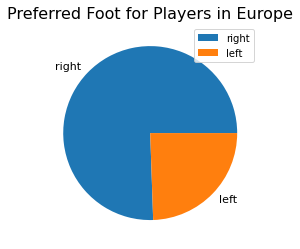

In [35]:
df_full_player_stats.preferred_foot.value_counts().plot(kind="pie",legend = True, fontsize=11)
plt.title("Preferred Foot for Players in Europe",fontsize=16)
plt.ylabel(' ');

Majority of players are right footed.

### Research Question 4  Does Prefered foot impact dribbling and ball control)

<ipython-input-38-9eb797be233f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_full_player_stats.groupby(["preferred_foot"])["dribbling","ball_control"].mean().plot(kind="bar",legend = True)


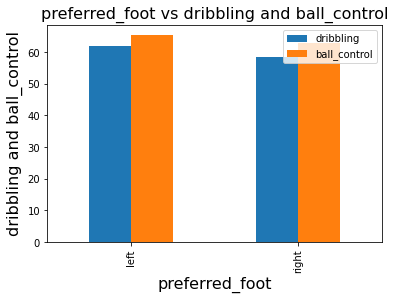

In [38]:
df_full_player_stats.groupby(["preferred_foot"])["dribbling","ball_control"].mean().plot(kind="bar",legend = True)
plt.title("preferred_foot vs dribbling and ball_control",fontsize=16)
plt.xlabel("preferred_foot",fontsize=16)
plt.ylabel("dribbling and ball_control",fontsize=16);

Preferred foot has no impact in ball_control and dribbling

### Research Question 5  Home &Away Goals)

<ipython-input-41-726214b60853>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_match_league_flitered.groupby(["name"])["home_team_goal","away_team_goal"].sum().plot(kind="bar")


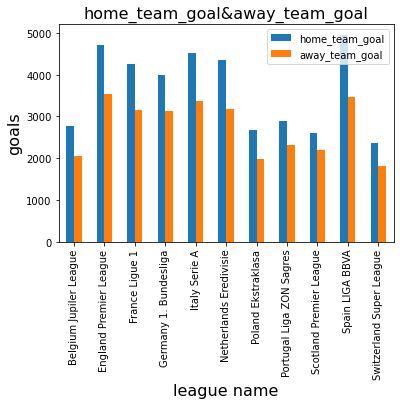

In [41]:
df_match_league_flitered.groupby(["name"])["home_team_goal","away_team_goal"].sum().plot(kind="bar")
plt.title("home_team_goal&away_team_goal",fontsize=16)
plt.xlabel("league name",fontsize=16)
plt.ylabel("goals",fontsize=16);

home advantage is a very big part of football

<a id='conclusions'></a>
## Conclusions
#for Question 1:it is clear that all physical arrtibutes get less by age

#for Question 2:tall players have a big advantage in heading accuracy but it is a weakness point in other attributes like speed.

#for Question 3:This is pretty clear as in only about 1 player in 4 is left footed. Majority of players are right footed.

#for Question 4:Prefered foot does not have any impact dribbling and ball control

#for Question 5:home advantage is a very big part of football

Limitations

pd.read_sql() in Python runs SQLite syntax only and thus I was not able to apply window functions which would have made
life simpler at some parts.


In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295